<a href="https://colab.research.google.com/github/st3vejobs/DATA-602-Final-Project/blob/main/DATA_602_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 602 Final Project

# Shane Hylton

## Fantasy Football Projections

# Table of contents
1. [Abstract](#abstract)
  1. [Research Questions](#quest)
2. [Part I](#parti)
  1. [Data Wrangling](#wrangle)
  2. [Linear Regression](#linreg)
    1. [Multiple Regression](#multreg)
    2. [Univariate Model](#tarpt)
    3. [Analysis](#analysis)
    4. [Summary of Two Models](#twomod)
3. [Part II](#partii)
    1. [K-Nearest Neighbors](#knn)
    2. [Pass Catcher or Running Back?](#pcc)
    3. [KNN Fit Results](#result)
4. [Conclusion](#conclusion)


# Abstract <a name="abstract"></a>

In this project, I sought to develop a regression model that is able to predict total yards in a week for a player given an array of statistics. I also aimed to develop a model that can provide a prediction of fantasy point total given only one variable as an input.


As a secondary element of the project, I tested the ability of the K-Nearest Neighbors method of classification to predict the position of a player given their statline. 

## Research Questions: <a name="quest"></a>

Can I predict the total yards or fantasy points in a week for a player given limited data?

Can I predict a player's position based on their recorded statistics?

I explored weekly wide receiver statistics for the regression problem.

I explored Tight Ends, Running Backs, and Wide Receivers for the classification problem.

For the purpose of the predictive models, I split the data from the 2021 season and used a portion of the data to test my predictions.

## Conclusions:

I was able to fit a multiple regression model using four variables to predict yards in a game. This prediction led to an R-squared of 0.882.


I was also able to fit a linear model to predict fantasy point totals given only targets. This model was understandably less productive than the first model. The R-squared for the second model was 0.451.


The KNN Classifier was 77% accurate when predicting positions from a pool of wide receivers, running backs, and tight ends. When wide receivers and tight ends are labeled as pass-catchers instead, the accuracy jumped to 86%. 

[Data Source: FantasyPros](https://www.fantasypros.com/nfl/stats/wr.php?scoring=PPR)


## Package Import and Quick View

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


raw_wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/2021-WR-Statistics/main/FantasyPros_Fantasy_Football_Statistics_WR.csv"))

print(raw_wr.head())
print(raw_wr.dtypes)
for i in range(0, len(raw_wr)):
  raw_wr.at[i,'YDS'] = str(raw_wr.at[i,'YDS'])
  raw_wr.at[i,'YDS'] = raw_wr.at[i,'YDS'].replace(",","")

raw_wr['YDS'] = pd.to_numeric(raw_wr['YDS'], errors = 'coerce')
print(raw_wr.head())
wr = pd.DataFrame(raw_wr.dropna())

print(wr.describe())

   Rank                  Player    REC    TGT    YDS   Y/R    LG  20+    TD  \
0   1.0       Cooper Kupp (LAR)  145.0  191.0  1,947  13.4  59.0  0.0  16.0   
1   2.0      Davante Adams (LV)  123.0  169.0  1,553  12.6  59.0  0.0  11.0   
2   3.0       Deebo Samuel (SF)   77.0  121.0  1,405  18.2  83.0  0.0   6.0   
3   4.0  Justin Jefferson (MIN)  108.0  167.0  1,616  15.0  56.0  0.0  10.0   
4   5.0     Ja'Marr Chase (CIN)   81.0  128.0  1,455  18.0  82.0  0.0  13.0   

    ATT  YDS.1  TD.1   FL     G   FPTS  FPTS/G    ROST  
0   4.0   18.0   0.0  0.0  17.0  439.5    25.9  100.0%  
1   0.0    0.0   0.0  0.0  16.0  344.3    21.5  100.0%  
2  59.0  365.0   8.0  2.0  16.0  339.0    21.2   98.8%  
3   6.0   14.0   0.0  1.0  17.0  330.4    19.4   99.9%  
4   7.0   21.0   0.0  1.0  17.0  304.6    17.9   98.5%  
Rank      float64
Player     object
REC       float64
TGT       float64
YDS        object
Y/R       float64
LG        float64
20+       float64
TD        float64
ATT       float64
YDS

# Part I <a name="parti"></a>
## Weekly Scores Data

Below, I will add the data for wide receiver statistics for each week of the 2021 season. From there, I will select 80% for training and 20% for testing. I will choose roughly 80% of the weeks available at random for training. I will use regression to predict future scores and yards given other predictors.


## Data Import

In [2]:
wk18_wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_WR_18.csv"))

wk17_wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_WR_17.csv"))

wk16_wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_WR_16.csv"))

wk15_wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_WR_15.csv"))

wk14_wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_WR_14.csv"))

wk13_wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_WR_13.csv"))

wk12_wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_WR_12.csv"))

wk11_wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_WR_11.csv"))

wk10_wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_WR_10.csv"))

wk9_wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_WR_9.csv"))

wk8_wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_WR_8.csv"))

wk7_wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_WR_7.csv"))

wk6_wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_WR_6.csv"))

wk5_wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_WR_5.csv"))

wk4_wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_WR_4.csv"))

wk3_wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_WR_3.csv"))

wk2_wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_WR_2.csv"))

wk1_wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_WR_1.csv"))


### Predicting Future Scores

I will make an all-inclusive model for all players as a whole. Fantasy Points on their own are a tricky thing to use in regression, because fantasy points are simply a representative sum each stat line. In order to predict fantasy points, I can work to find one predictor for all other variables and use that one predictor to calculate an expected fantasy point total.

For this project, I will assume that fantasy points do not have a known formula.

I will begin by using Fantasy Points as my target variable. 
In this exercise, I will use Targets as my feature variable. One of the easiest variables to predict is the number of targets a player will receive in a game. 

## Linear Regression <a name="linreg"></a>

I will be working with data where yards exceeds 10.

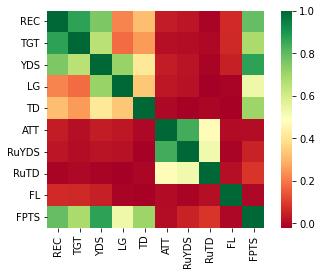

In [3]:
weekly = pd.concat([wk1_wr,wk2_wr,wk3_wr,wk4_wr,wk5_wr,wk6_wr,wk7_wr,wk8_wr,wk9_wr,wk10_wr,wk11_wr,wk12_wr,wk13_wr,wk14_wr,wk15_wr,wk16_wr,wk17_wr,wk18_wr])

weekly = weekly.dropna()
weekly['YDS'] = weekly['YDS'].astype(float)
weekly = weekly[weekly['YDS'] > 10]
#print(weekly.describe())

weekly = weekly.drop(['Rank','20+','ROST'], axis = 1)
weekly = weekly.rename({'Y/R': 'YPC','YDS.1' : 'RuYDS','TD.1':'RuTD'},axis = 1)
#print(weekly.describe())

nameless = weekly.drop(['Player','G','FPTS/G','YPC'],axis = 1)
#print(nameless.head())

sns.heatmap(nameless.corr(),square = True,cmap='RdYlGn')

From the Heat Map, it is easy to see that rushing statistics have very little to do with fantasy points for wide receivers. Yards and Receptions are the most heavily correlated. This checks out, because receivers gain 1 point per reception and 1 point for every ten yards gained. 

There is an obvious and strong linear relationship between targets and fantasy score. 

## Testing a Full Model <a name="multreg"></a>


In [4]:
X_all = nameless.drop(['FPTS'], axis = 1)
y = np.array(nameless['FPTS'])
X = np.array(nameless['TGT'])

y_reshaped = y.reshape(-1,1)
X_reshaped = X.reshape(-1,1)
X_train,X_test,y_train,y_test = tts(X_all, y, test_size = 0.20,random_state = 42)
reg_all = lr()
reg_all.fit(X_train,y_train)
y_pred = reg_all.predict(X_test)
rmse = np.sqrt(mse(y_test,y_pred))
print(f'R-squared: {round(reg_all.score(X_test,y_test),3)}')
print(f'Root-Mean Squared Error: {rmse}')
print(reg_all.coef_)
print(X_train.columns)

R-squared: 0.939
Root-Mean Squared Error: 1.8579880729345115
[ 9.51293300e-01  2.41957924e-02  1.04273825e-01  9.60453140e-04
  5.84770379e+00 -1.55465895e+00  1.92796015e-01  6.77550049e+00
 -1.76620590e+00]
Index(['REC', 'TGT', 'YDS', 'LG', 'TD', 'ATT', 'RuYDS', 'RuTD', 'FL'], dtype='object')


The R-squared is better equipped to represent the model because it gauges the quality of prediction  based on percentage while the RMSE gauges the quality of the prediction based on the variation between predicted and actual values. With that being said, being able to predict fantasy points given all of the components of a fantasy score does not do much beyond telling us which ruleset is being used for the fantasy score.

Next, I will adjust the model to predict yards given all of the other data.

In [5]:
X_mod = X_all.drop(['YDS'],axis = 1)
y = np.array(nameless['YDS'])
X_train,X_test,y_train,y_test = tts(X_mod, y, test_size = 0.20,random_state = 42)
reg_all = lr()
reg_all.fit(X_train,y_train)
y_pred = reg_all.predict(X_test)
rmse = np.sqrt(mse(y_test,y_pred))
print(f'R-squared: {round(reg_all.score(X_test,y_test),3)}')
print(f'Root-Mean Squared Error: {rmse}')
print(reg_all.coef_)
print(X_train.columns)

R-squared: 0.882
Root-Mean Squared Error: 11.958653952704104
[ 9.03090825 -0.03671681  1.3838607   1.45215495  0.24108451 -0.09072959
  3.69822291  1.71965963]
Index(['REC', 'TGT', 'LG', 'TD', 'ATT', 'RuYDS', 'RuTD', 'FL'], dtype='object')


$$YDS = 9.03\times REC -.04 \times TGT + 1.38 \times LG + 1.45 \times TD +0.24 \times ATT - .09 \times RuYDS +3.7 \times RuTD + 1.72 \times FL $$

Looking at the linear equation, it is fair to remove TGT, ATT, RuYDS, FL and RuTD from the model. 

In [6]:
X_mod = X_all.drop(['YDS','TGT','ATT','RuYDS','RuTD','FL'],axis = 1)
y = np.array(nameless['YDS'])
X_train,X_test,y_train,y_test = tts(X_mod, y, test_size = 0.20,random_state = 42)
reg_all = lr()
reg_all.fit(X_train,y_train)
y_pred = reg_all.predict(X_test)
rmse = np.sqrt(mse(y_test,y_pred))
print(f'R-squared: {round(reg_all.score(X_test,y_test),3)}')
print(f'Root-Mean Squared Error: {rmse}')
print(reg_all.coef_)
print(X_train.columns)

R-squared: 0.882
Root-Mean Squared Error: 11.961276255698403
[8.98772342 1.38223633 1.48933423]
Index(['REC', 'LG', 'TD'], dtype='object')


Removing those five variables had no impact on R-squared, which is rather surprising.

Based on the Heat Map, FL should have little to nothing to do with yards. Including FL did not affect the model much one way or another, so I omitted it. 

$$YDS = 8.99 \times REC + 1.38 \times LG + 1.49 \times TD $$

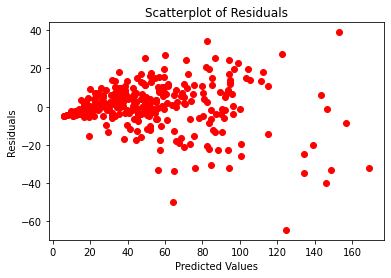

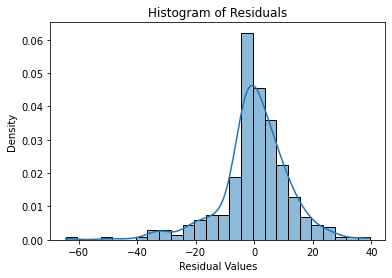

In [7]:

#plt.scatter(X_test["TGT"],y_pred)
plt.scatter(y_pred,y_pred - y_test,color = 'red')
plt.title("Scatterplot of Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

resid = pd.DataFrame({"Residuals" :y_pred - y_test})
#print(resid)
resid_hist = sns.histplot(data = resid, x="Residuals",stat = "density",binwidth = 4, kde = True).set(title = "Histogram of Residuals", xlabel = "Residual Values", ylabel = "Density")
plt.show(resid_hist)

The residuals seem to be randomly distributed, but there is not constant variability. The histogram of residuals is nearly normal. This model may be effective at predicting yards.

## Using Targets to Predict Fantasy Points <a name="tarpt"></a>

As a final step in the regression problem, I would like to see if I can use Targets to create a prediction for the total fantasy score. I originally thought to use targets to predict longest reception, touchdowns, receptions, and fumbles lost. I tried this, but the R-squared for most of the variables was so small, it did not make sense to include them. Instead, I will aim to use targets alone as a predictor for fantasy points.

RMSE: 5.596800048196686
The R-squared for this model is: 0.451


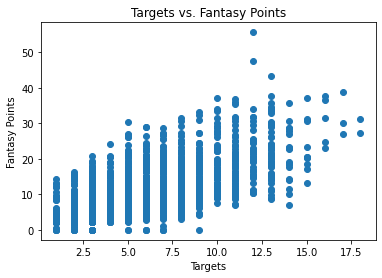

[[1.54084009]]


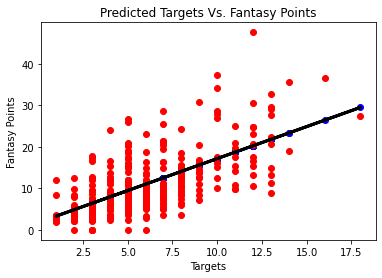

The R-squared for this model is: 0.466


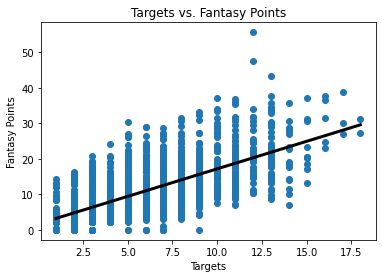

In [8]:
reg = lr()
X = np.array(nameless['TGT'])
y = np.array(nameless['FPTS'])
X = X.reshape(-1,1)
y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.20, random_state=42)

reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
rmse = np.sqrt(mse(y_test,y_pred))

print(f'RMSE: {rmse}')

print(f'The R-squared for this model is: {round(reg.score(X_test,y_test),3)}')

plt.scatter(X,y)
plt.title("Targets vs. Fantasy Points")
plt.xlabel("Targets")
plt.ylabel("Fantasy Points")
plt.show()
print(reg.coef_)
tg_rec = reg.coef_

plt.scatter(X_test,y_pred,color = 'blue')
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test,y_pred, linewidth = 3, color = 'black')
plt.title("Predicted Targets Vs. Fantasy Points")
plt.xlabel("Targets")
plt.ylabel("Fantasy Points")
plt.show()


## Alternative Method
X_all = nameless.drop(['FPTS'], axis = 1)
y = np.array(nameless['FPTS'])
X = np.array(nameless['TGT'])

y_reshaped = y.reshape(-1,1)
X_reshaped = X.reshape(-1,1)

reg = lr()

prediction_space = np.linspace(min(X),max(X)).reshape(-1,1)

reg.fit(X_reshaped,y_reshaped)

y_pred = reg.predict(prediction_space)

print(f'The R-squared for this model is: {round(reg.score(X_reshaped,y_reshaped),3)}')

plt.scatter(X,y)

plt.plot(prediction_space,y_pred,color = 'black',linewidth = 3)
plt.title("Targets vs. Fantasy Points")
plt.xlabel("Targets")
plt.ylabel("Fantasy Points")
plt.show()


### Analysis <a name="analysis"></a>

The R-squared is not terrible here. Considering the goal of predicting fantasy points with only a single input, targets looks to be a sensible choice. Of all of the variables, targets are the easiest to predict as inputs. A predicted value for targets serves as an adequate starting point for the fantasy point calculation. 

## The Two Linear Models <a name="twomod"></a>

With only one predictor, the number of targets, total fantasy points can be predicted with an R-squared of 0.451. While it is not necessarily the strongest, TGT is one of the easiest variables to predict outside of the model, so it is a good choice to use as the one predictor.

$$FPTS \approx 1.54 \times TGT $$

If Receptions, longest catch, and touchdowns are known, then a strong estimate for total yards can be found.

$$YDS = 8.99 \times REC + 1.38 \times LG + 1.49 \times TD $$

# Part II: <a name="partii"></a>

## Classification



### Season Long Scoring Data

There is plenty of wrangling to take care of here. Not every column fits exactly the same across positions. I will need to reconstruct the dataframes and then combine all three.


In [9]:
wr = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/2021-WR-Statistics/main/FantasyPros_Fantasy_Football_Statistics_WR.csv"))
wr["Pos"] = "WR"
rb = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_RB_2021.csv"))
rb["Pos"] = "RB"
te = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/st3vejobs/Fantasy_Probability/main/FantasyPros_Statistics_TE_2021.csv"))
te["Pos"] = "TE"

wr = wr.drop(["20+","FPTS/G","ROST"], axis = 1)
wr = wr.rename({"YDS.1":"RuYDS","TD.1":"RuTD"},axis = 1)
te = te.drop(["20+","FPTS/G","ROST"], axis = 1)
te = te.rename({"YDS.1":"RuYDS","TD.1":"RuTD"},axis = 1)

rb = rb.drop(["Y/A","20+","ROST","FPTS/G"],axis = 1)

rb = rb.rename({"YDS":"RuYDS","TD":"RuTD","TD.1": "TD","YDS.1" : "YDS"}, axis = 1)

wr_cols = wr.columns.tolist()

rb = rb[wr_cols]

data = pd.concat([rb,wr,te])
data['YDS'] = data['YDS'].astype(str)
data['YDS'] = data['YDS'].str.replace(',','').astype(float)
data['RuYDS'] = data['RuYDS'].astype(str)
data['RuYDS'] = data['RuYDS'].str.replace(',','').astype(float)

data = pd.DataFrame(data.dropna())
y = data['Pos'].values
X = data.drop(['Player','Pos'], axis = 1).values


print(data.head())

print(data.describe())


   Rank                 Player   REC   TGT    YDS   Y/R    LG   TD    ATT  \
0   1.0  Jonathan Taylor (IND)  40.0  51.0  360.0   9.0  83.0  2.0  332.0   
1   2.0    Austin Ekeler (LAC)  70.0  94.0  647.0   9.2  28.0  8.0  206.0   
2   3.0     Najee Harris (PIT)  74.0  94.0  467.0   6.3  37.0  3.0  307.0   
3   4.0        Joe Mixon (CIN)  42.0  48.0  314.0   7.5  32.0  3.0  292.0   
4   5.0     James Conner (ARI)  37.0  39.0  375.0  10.1  35.0  3.0  202.0   

    RuYDS  RuTD   FL     G   FPTS Pos  
0  1811.0  18.0  2.0  17.0  373.1  RB  
1   911.0  12.0  3.0  16.0  343.8  RB  
2  1200.0   7.0  0.0  17.0  300.7  RB  
3  1205.0  13.0  1.0  16.0  287.9  RB  
4   752.0  15.0  0.0  15.0  257.7  RB  
             Rank         REC         TGT          YDS         Y/R  \
count  917.000000  917.000000  917.000000   917.000000  917.000000   
mean   156.827699   13.322792   19.847328   145.938931    5.506870   
std     94.378285   22.348287   33.141562   268.707859    5.953611   
min      1.000000

## KNN Classifier <a name="knn"></a>

I will start the KNN fit with 6 neighbors, and I will work to optimize the number of neighbors. I will use a test size of 20%.

0.7771739130434783


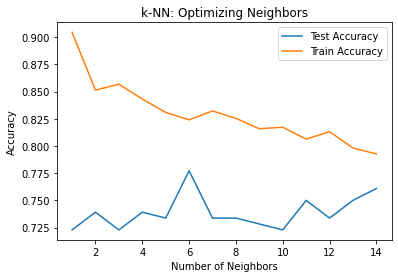

0.7771739130434783


In [10]:
X_train, X_test, y_train, y_test = tts(X,y,test_size = 0.2, random_state = 42,stratify = y)

knn = KNN(n_neighbors = 6)

knn.fit(X_train,y_train)

score = knn.score(X_test,y_test) 
print(score)

neighbors = np.arange(1,15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  knn = KNN(n_neighbors = k)
  knn.fit(X_train,y_train)
  train_accuracy[i] = knn.score(X_train,y_train)
  test_accuracy[i] = knn.score(X_test,y_test)

plt.title('k-NN: Optimizing Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Test Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Train Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

knn_opt = KNN(n_neighbors = 6)
knn_opt.fit(X_train,y_train)
score_opt = knn_opt.score(X_test,y_test)
print(score_opt)


## Primary Pass Catchers vs. Running Backs <a name="pcc"></a>

Because Tight Ends and Wide Receivers often line up alongside one another, I will modify the Tight Ends and Wide Receivers to be "PC" and I will run the KNN Test again.

0.842391304347826


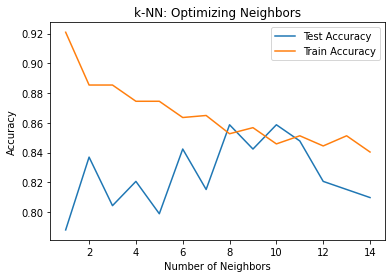

0.8586956521739131


In [11]:
pcte = te
pcte["Pos"] = "PC"
pcwr = wr
pcwr["Pos"] = "PC"

data_pc = pd.concat([pcte,pcwr,rb])

data_pc['YDS'] = data_pc['YDS'].astype(str)
data_pc['YDS'] = data_pc['YDS'].str.replace(',','').astype(float)
data_pc['RuYDS'] = data_pc['RuYDS'].astype(str)
data_pc['RuYDS'] = data_pc['RuYDS'].str.replace(',','').astype(float)

data_pc = pd.DataFrame(data_pc.dropna())
y_pc = data_pc['Pos'].values
X_pc = data_pc.drop(['Player','Pos'], axis = 1).values


X_train_pc, X_test_pc, y_train_pc, y_test_pc = tts(X_pc,y_pc,test_size = 0.2, random_state = 42,stratify = y_pc)

knn_pc = KNN(n_neighbors = 6)

knn_pc.fit(X_train_pc,y_train_pc)

score_pc = knn_pc.score(X_test_pc,y_test_pc) 
print(score_pc)

neighbors_pc = np.arange(1,15)
train_accuracy_pc = np.empty(len(neighbors_pc))
test_accuracy_pc = np.empty(len(neighbors_pc))

for i, k in enumerate(neighbors_pc):
  knn_pc = KNN(n_neighbors = k)
  knn_pc.fit(X_train_pc,y_train_pc)
  train_accuracy_pc[i] = knn_pc.score(X_train_pc,y_train_pc)
  test_accuracy_pc[i] = knn_pc.score(X_test_pc,y_test_pc)

plt.title('k-NN: Optimizing Neighbors')
plt.plot(neighbors_pc, test_accuracy_pc, label = 'Test Accuracy')
plt.plot(neighbors_pc, train_accuracy_pc, label = 'Train Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

knn_pc_opt = KNN(n_neighbors = 8)
knn_pc_opt.fit(X_train_pc,y_train_pc)
score_pc_opt = knn_pc_opt.score(X_test_pc,y_test_pc)
print(score_pc_opt)


### KNN Fit Results <a name="result"></a>

For the first model, 6 neighbors is optimal. For the second model, 8 neighbors is optimal. As I expected, the second model is around 10% more accurate than the first. 



# Conclusions <a name="conclusion"></a>

This project went through multiple different iterations. There were multiple models that I created that were discarded for a better model. Given the restrictions of my research question, the two best models I obtained were: 


$$FPTS \approx 1.54 \times TGT $$

With an R-squared of 0.451.

$$YDS = 8.99 \times REC + 1.38 \times LG + 1.49 \times TD $$

With an R-squared of 0.882.


As a next step, I would like to work towards being able to produce accurate projections for players on a weekly basis. I will aim to have that model ready for this fall and I will test my performance week over week.

The KNN Classifier was very successful. The model was 77% accurate when predicting labels of WR, RB, and TE. The model was 86% accurate when predicting labels of PC and RB. 